In [71]:
# Task : why employees are leaving.

# Getting the Data Information

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [123]:
# load  data 

employee_df = pd.read_csv('./AISC1001_employee_left_dataset_pratik_domadiya_500199494.csv')#https://www.kaggle.com/lnvardanyan/hr-analytics/data?select=turnover.csv
(employee_df) # print the whole data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [125]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Cleaning Up the Data

In [74]:
# Check to see if there are any missing values in our data set
employee_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No missing values are present

In [75]:
# Renaming certain columns for better readability
df = employee_df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'left'
                        })

In [76]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Exploration

In [77]:
# The dataset contains 10 columns and 14999 observations
df.shape
#About 15,000 employee observations and 10 features

(14999, 10)

In [78]:
df.dtypes# checking the data types
# dataset contains 2 categorical and 8 numerical columns


satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
left                     int64
promotion                int64
department              object
salary                  object
dtype: object

In [79]:
employee_left_rate = df.left.value_counts() / len(df)
employee_left_rate
# 0 means stayed and 1 means left the company. So 76% of the employee stayed and remaining are left.

0    0.761917
1    0.238083
Name: left, dtype: float64

In [80]:
# Display the statistical overview of the employees
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


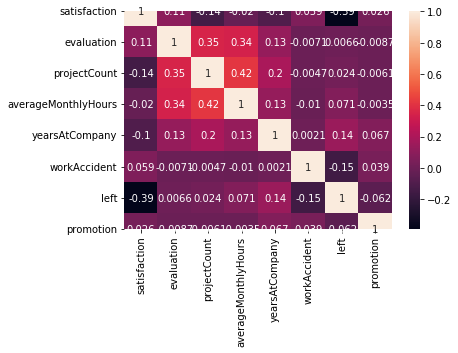

In [81]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)


(corr)

There is a positive(+) association between projectCount, averageMonthlyHours, and evaluation, according to the heatmap. This could indicate that employees who worked longer hours and completed more projects were given higher ratings.

left and satisfaction are frequently associated in negative(-) relationships. I assume that when people are dissatisfied with their jobs, they are more likely to leave.

# Statistical Test for Correlation

T-Test with One Sample (Measuring Satisfaction Level)

A one-sample t-test determines whether a sample mean differs from that of the population. Because satisfaction has the strongest relationship with our dependent variable left, let's see if the average level of satisfaction of employees who have had left differs from those who have not.

Is there a substantial difference in the mean level of satisfaction between employees who have had left and temployees who have not had left?

(H0) Null Hypothesis : The null hypothesis states that there is no difference in employee satisfaction between those who leave and those who stay.

(HA) Alternate Hypothesis : The alternative hypothesis is that there is a difference in employee satisfaction between those who leave and those who stay.

In [82]:
#Let's compare the means of our employee left satisfaction against the employee population satisfaction
emp_population = df['satisfaction'][df['left'] == 0].mean()
emp_left_satisfaction = df[df['left']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population who had not left is: ' + str(emp_population))
print( 'The mean satisfaction for employees who had a left is: ' + str(emp_left_satisfaction) )

The mean satisfaction for the employee population who had not left is: 0.666809590479524
The mean satisfaction for employees who had a left is: 0.4400980117614114


In [83]:
#Let's run a t-test with a 95% confidence level to verify if the null hypothesis that the sample originates from 
#the same distribution as the employee population is correctly rejected.

import scipy.stats as stats
stats.ttest_1samp(a=  df[df['left']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

The test statistic "t" is equal to -51.33% in this case. This test statistic tells us how much the sample mean deviates from the null hypothesis. We reject the null hypothesis if the t-statistic is outside the quantiles of the t-distribution according to our confidence level and degrees of freedom.


If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis

In [84]:
degree_of_freedom = len(df[df['left']==1])

Left_Quartile = stats.t.ppf(0.025,degree_of_freedom)  # Left Quartile

Right_Quartile = stats.t.ppf(0.975,degree_of_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(Left_Quartile))
print ('The t-distribution right quartile range is: ' + str(Right_Quartile))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


c:\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Employee Satisfaction Distribution')

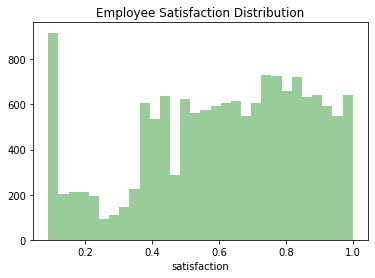

In [85]:
# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g").set_title('Employee Satisfaction Distribution')#.set_ylabel('Employee Count')
# axes[0].set_ylabel('Employee Count')


There is a huge spike for employees with low satisfaction and high satisfaction.

Text(0.5, 1.0, 'Employee Evaluation Distribution')

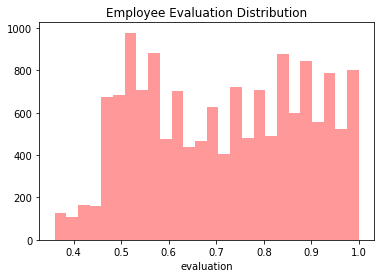

In [86]:
# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r").set_title('Employee Evaluation Distribution')
# axes[1].set_ylabel('Employee Count')

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

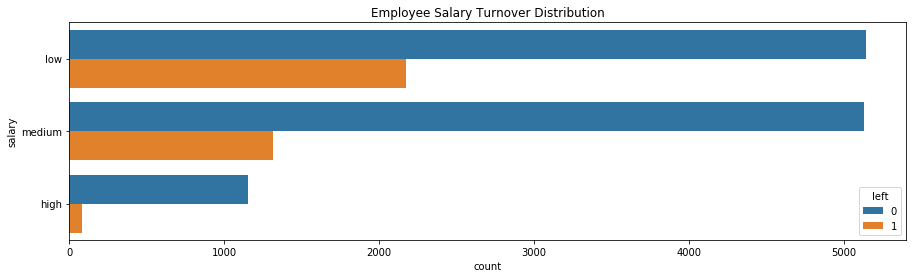

In [87]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution')

The majority of those who left had a low or mid-level salary.

There aren't many high-paid employees left.

Employees with low to average salaries are more likely to depart.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

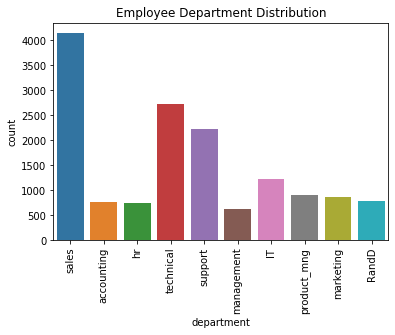

In [88]:
sns.countplot(x='department', data=df).set_title('Employee Department Distribution')
 
# Rotate x-labels
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

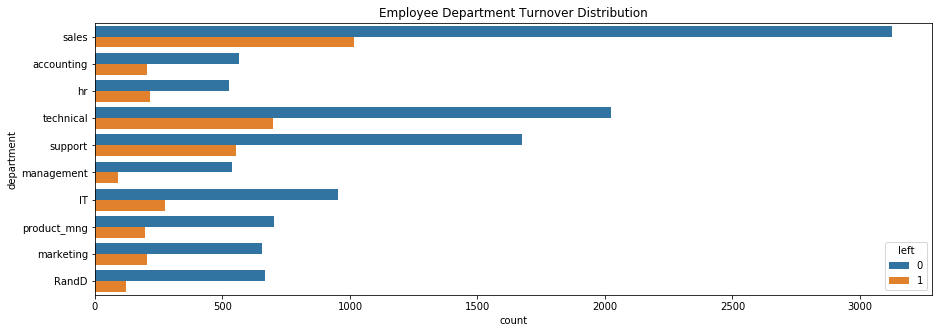

In [89]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='left', data=df).set_title('Employee Department Turnover Distribution')

The sales, technical, and support department were the top 3 departments to have stable employee 


[Text(0, 0.5, 'Percent')]

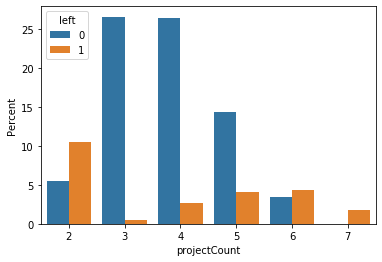

In [90]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

More than half of the employees with 2,6, and 7 projects left the company

Majority of the employees who did not leave the company had 3,4, and 5 projects

All of the employees with 7 projects left the company

There is an increase in employee turnover rate as project count increases

[Text(0, 0.5, 'Percent')]

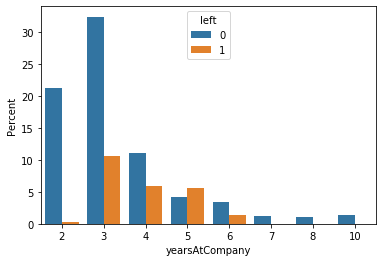

In [91]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

More than half of the employees with 4 and 5 years left the company

Employees with 5 years should highly be looked into

# Data Preparation

In [92]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [93]:
# perform standard scaler on numeric data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['satisfaction', 'evaluation','projectCount','averageMonthlyHours','yearsAtCompany','workAccident','promotion']]= scaler.fit_transform(df[['satisfaction', 'evaluation','projectCount','averageMonthlyHours','yearsAtCompany','workAccident','promotion']])
df.head()
# Creating a dummy variable for some of the categorical variables
dummy_cat = pd.get_dummies(df[['department','salary']])
# Adding the results to the main dataframe
df = pd.concat([df, dummy_cat], axis=1)
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1,-0.147412,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1,-0.147412,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1,-0.147412,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1,-0.147412,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1,-0.147412,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [94]:
df.drop(columns=['department','salary'],inplace=True)


In [96]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,left,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1,-0.147412,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1,-0.147412,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1,-0.147412,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1,-0.147412,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1,-0.147412,0,0,...,0,0,0,0,1,0,0,0,1,0


# Modelling

In [98]:
 # split the data for train and test

y = df['left']
print(y)
X = df.drop(columns=['left'])
print(X)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64
       satisfaction  evaluation  projectCount  averageMonthlyHours  \
0         -0.936495   -1.087275     -1.462863            -0.882040   
1          0.752814    0.840707      0.971113             1.220423   
2         -2.022479    0.957554      2.593763             1.420657   
3          0.431041    0.899131      0.971113             0.439508   
4         -0.976716   -1.145699     -1.462863            -0.841993   
...             ...         ...           ...                  ...   
14994     -0.856051   -0.853580     -1.462863            -1.002181   
14995     -0.976716   -1.379394     -1.462863            -0.821970   
14996     -0.976716   -1.087275     -1.462863            -1.162368   
14997     -2.022479    1.424944      1.782438             1.580845   
14998     -0.976716   -1.145699     -1.462863            -0.862016   

In [102]:
# prepare the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_tr_array = X_train
X_ts_array = X_test
y_tr_array = y_train.values
y_ts_array = y_test.values

print('Input train data Shape', (X_tr_array.shape))
print('Output train data Shape', y_tr_array.shape)
print('Input test data Shape', (X_ts_array.shape))
print('Output test data Shape', y_ts_array.shape)

Input train data Shape (12749, 20)
Output train data Shape (12749,)
Input test data Shape (2250, 20)
Output test data Shape (2250,)


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty='l2', C=1,solver='lbfgs')

log_model.fit(X_tr_array, y_tr_array)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_ts_array, log_model.predict(X_ts_array)))

Logistic accuracy is 0.79


In [113]:
pred = log_model.predict(X_ts_array)# make a prediction of the data

Text(0.5, 1, 'Accuracy Score: 0.7897777777777778')

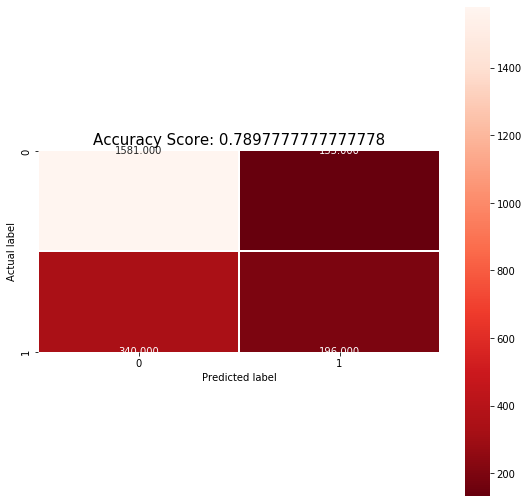

In [114]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(log_model.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [115]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,pred))# display classification report.

F1 score: 0.7706097151878325
Recall: 0.7897777777777778
Precision: 0.7688694742567835

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1714
           1       0.60      0.37      0.45       536

    accuracy                           0.79      2250
   macro avg       0.71      0.64      0.66      2250
weighted avg       0.77      0.79      0.77      2250



# support vector classifier

In [109]:
from sklearn import svm
# modelling the data
model_svc = svm.SVC(gamma=0.001,C=1.0,kernel='rbf')
model_svc.fit(X_tr_array, y_tr_array)
pred_svc_all=model_svc.predict(X_ts_array)
print(" SVC model accuracy with "+"rbf"+" kernel: ",accuracy_score(y_ts_array, model_svc.predict(X_ts_array))*100,"%")

 SVC model accuracy with rbf kernel:  76.22222222222223 %


In [116]:
pred = model_svc.predict(X_ts_array)# make a prediction of the data

Text(0.5, 1, 'Accuracy Score: 0.7622222222222222')

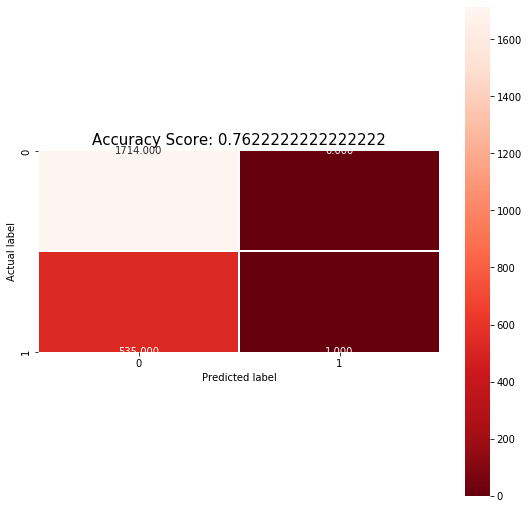

In [117]:
# print confusion metrics
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_ts_array,pred)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model_svc.score(X_ts_array, y_ts_array))
plt.title(all_sample_title, size = 15)

In [118]:
# display model metrics 
print ('F1 score:', metrics.f1_score(y_ts_array,pred,average='weighted'))# display f1_score 

print ('Recall:', metrics.recall_score(y_ts_array,pred,average='weighted'))# display recall 

print ('Precision:', metrics.precision_score(y_ts_array,pred,average='weighted'))# display precision

print ('\n clasification report:\n', metrics.classification_report(y_ts_array,pred))# display classification report.

F1 score: 0.6598259724926081
Recall: 0.7622222222222222
Precision: 0.8187856331208931

 clasification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1714
           1       1.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.88      0.50      0.43      2250
weighted avg       0.82      0.76      0.66      2250

